In [2]:
import numpy as np
import codecs
import re
import statistics
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np

# from functions import wordle_filter, compare_words, score_fn, choose_opt, auto_solver, sort_dict
from functions import choose_opt, auto_solver, sort_dict

## Read wordle list and counts how many times each letter appears

In [3]:
count_dict = {'overall' : {}, '1': {}, '2': {}, '3': {}, '4': {}, '5': {}}

In [4]:
import json

with open("wordle_clean_list.json", "r") as fp:
    wordle_list = json.load(fp)
for word in wordle_list:
    for i in range(len(word)): 
        #if line[i] in abc_es: # avoid jump line, and final line chars
        count_dict['overall'][word[i]] = count_dict['overall'].get(word[i], 0) + 1
        count_dict[str(i+1)][word[i]] = count_dict[str(i+1)].get(word[i], 0) + 1

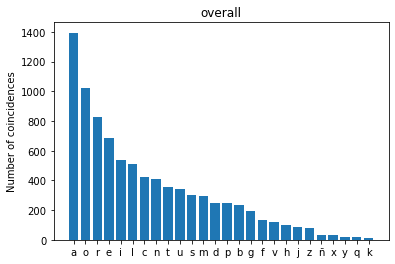

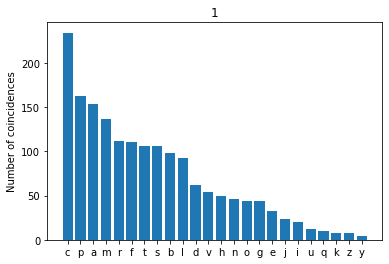

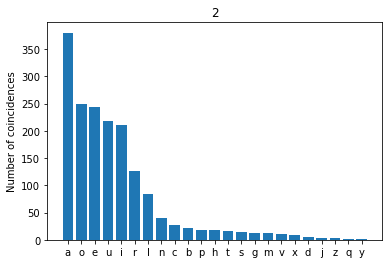

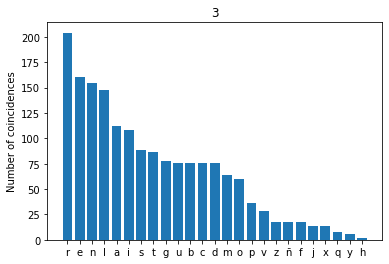

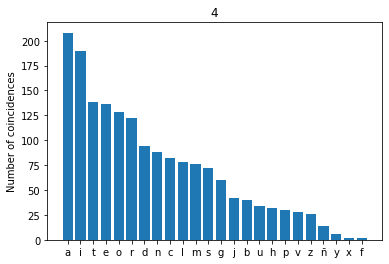

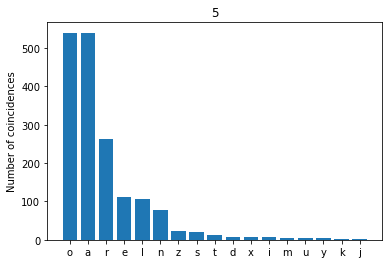

In [52]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

sorted_dict = {}

for d_name, dictionary in count_dict.items():
    sorted_dict[str(d_name)] = sort_dict(dictionary)

    D = sorted_dict[str(d_name)]
    plt.bar(*zip(*D.items()))
    plt.title(d_name)
    plt.ylabel('Number of coincidences')
    plt.show()

## Analize the best words to start

First check the words that are more optimal base on the average number of words remaining in all possible solutions
Less words remaining menas that choosing this word you filter most of the options (in average)

In [5]:
best_first_word, scored_dict = choose_opt(wordle_list, verbose=True)

00:00:00 1 nieve 120.2199074074074 0.4901306629180908
00:00:01 2 hueso 65.27083333333333 0.5461249351501465
00:00:01 3 titan 80.35879629629629 0.4991137981414795
00:00:02 4 flujo 96.64351851851852 0.5691263675689697
00:00:02 5 disco 55.91203703703704 0.4941251277923584
00:00:03 6 razon 45.40972222222222 0.40508508682250977
00:00:03 7 mural 42.229166666666664 0.45657801628112793
00:00:03 8 abril 37.414351851851855 0.40911364555358887
00:00:04 9 vejez 270.46064814814815 0.645681619644165
00:00:05 10 falso 49.01851851851852 0.48812437057495117
00:00:05 11 cañon 61.90046296296296 0.46912360191345215
00:00:05 12 obeso 79.27546296296296 0.44610071182250977
00:00:06 13 metal 46.613425925925924 0.44509339332580566
00:00:06 14 avena 67.7199074074074 0.46826171875
00:00:07 15 rubia 36.423611111111114 0.4251086711883545
00:00:07 16 pieza 54.113425925925924 0.48910999298095703
00:00:08 17 cuero 30.15277777777778 0.42909693717956543
00:00:08 18 noche 61.888888888888886 0.45710301399230957
00:00:09 

In [6]:
print(best_first_word)
print(scored_dict)

reina
{'reina': 23.761574074074073, 'cairo': 23.895833333333332, 'seria': 24.05324074074074, 'alero': 24.12037037037037, 'carie': 24.42824074074074, 'calor': 24.52314814814815, 'serio': 24.55324074074074, 'reino': 24.67824074074074, 'latir': 25.59490740740741, 'laser': 25.756944444444443, 'narco': 25.837962962962962, 'letra': 26.011574074074073, 'terna': 26.150462962962962, 'perla': 26.483796296296298, 'carne': 26.77314814814815, 'recta': 27.0625, 'salir': 27.10648148148148, 'radio': 27.546296296296298, 'cielo': 27.550925925925927, 'acero': 27.583333333333332, 'coral': 27.729166666666668, 'cerda': 27.96759259259259, 'corta': 28.10185185185185, 'linea': 28.166666666666668, 'liceo': 28.33564814814815, 'regia': 28.64351851851852, 'crema': 28.854166666666668, 'orina': 29.00462962962963, 'regio': 29.16435185185185, 'marco': 29.224537037037038, 'recto': 29.23611111111111, 'regla': 29.305555555555557, 'lepra': 29.47222222222222, 'feria': 29.64351851851852, 'moler': 29.756944444444443, 'comer'

Compare the optimal words, using the auto soler to check their behaviour and choose the best initial word.

In [67]:
best_word_list = ['cairo', 'reina', 'seria', 'alero', 'carie', 'calor', 'serio', 'reino', 'latir', 'narco', 'laser']

WORD: cairo
	 fail word: plata iters: 7
	 aveg tries 3.2337962962962963


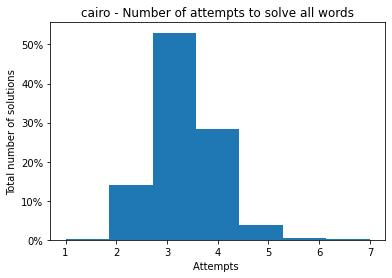

WORD: reina
	 aveg tries 3.216435185185185


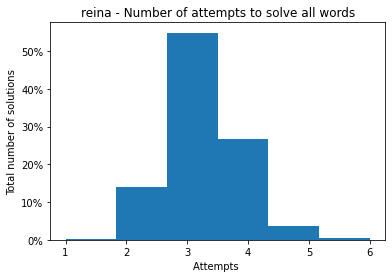

WORD: seria
	 fail word: plaga iters: 7
	 fail word: plata iters: 8
	 aveg tries 3.224537037037037


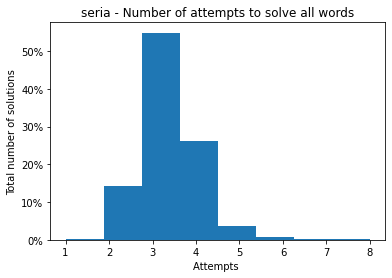

WORD: alero
	 fail word: plata iters: 7
	 aveg tries 3.2962962962962963


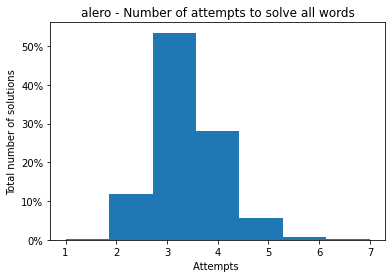

WORD: carie
	 fail word: plata iters: 7
	 aveg tries 3.2222222222222223


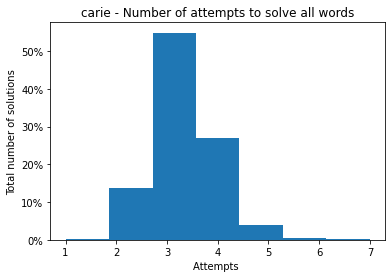

WORD: calor
	 aveg tries 3.2314814814814814


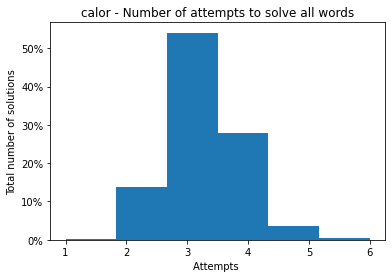

WORD: serio
	 fail word: plaga iters: 7
	 fail word: plata iters: 8
	 aveg tries 3.247685185185185


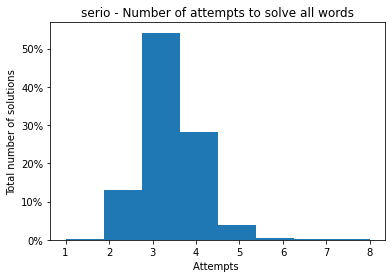

WORD: reino
	 aveg tries 3.232638888888889


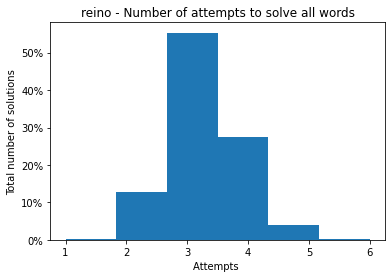

WORD: latir
	 aveg tries 3.212962962962963


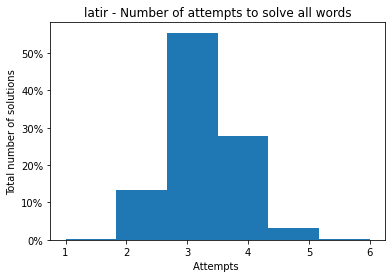

WORD: narco
	 aveg tries 3.236111111111111


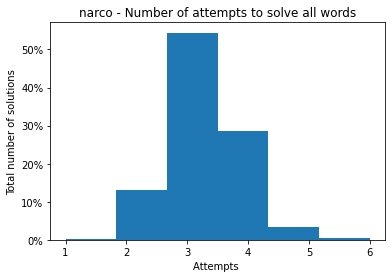

WORD: laser
	 fail word: plaga iters: 7
	 aveg tries 3.230324074074074


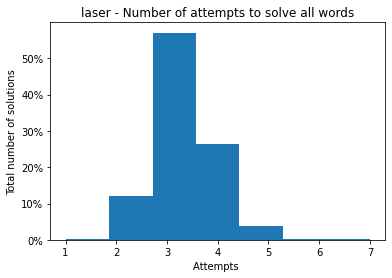

In [72]:
for optimal_word in best_word_list:
    total_tries = []
    print('WORD:', optimal_word)

    for word in wordle_list:
        solution, iter_need = auto_solver(wordle_list, word, init_word=optimal_word)
        if iter_need > 6:
            print('\t fail word:', solution, 'iters:', iter_need)
        total_tries.append(iter_need)
    average_tries = statistics.fmean(total_tries)
    print('\t aveg tries',average_tries)

    plt.hist(total_tries, bins=max(total_tries), weights=np.ones(len(total_tries)) / len(total_tries))
    plt.title(optimal_word + ' - Number of attempts to solve all words')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.xlabel('Attempts ')
    plt.ylabel('Total number of solutions')
    plt.show()

In [8]:
list(scored_dict.keys())

['reina',
 'cairo',
 'seria',
 'alero',
 'carie',
 'calor',
 'serio',
 'reino',
 'latir',
 'laser',
 'narco',
 'letra',
 'terna',
 'perla',
 'carne',
 'recta',
 'salir',
 'radio',
 'cielo',
 'acero',
 'coral',
 'cerda',
 'corta',
 'linea',
 'liceo',
 'regia',
 'crema',
 'orina',
 'regio',
 'marco',
 'recto',
 'regla',
 'lepra',
 'feria',
 'moler',
 'comer',
 'cerdo',
 'riego',
 'norma',
 'cuero',
 'leona',
 'nuera',
 'ebrio',
 'tarea',
 'caber',
 'claro',
 'litro',
 'cenar',
 'cargo',
 'parto',
 'ruina',
 'doler',
 'norte',
 'rapel',
 'celta',
 'labor',
 'barco',
 'libra',
 'ronda',
 'termo',
 'cameo',
 'opera',
 'moral',
 'cedro',
 'coger',
 'atril',
 'lenta',
 'raton',
 'tecla',
 'labio',
 'tarde',
 'fiera',
 'marea',
 'agrio',
 'solar',
 'tenor',
 'parte',
 'cobra',
 'rango',
 'menor',
 'sorda',
 'batir',
 'utero',
 'metro',
 'negra',
 'encia',
 'copia',
 'muero',
 'rusia',
 'lento',
 'tocar',
 'libro',
 'suero',
 'roble',
 'nieto',
 'polea',
 'ileso',
 'ilesa',
 'dolar',
 'farol',


In [9]:
import json
name = 'opt_list.json'

with open(name, "w") as fp:
    json.dump(list(scored_dict.keys()), fp)